## Data Analysis with pandas

We are going to examine data from the [Bangalore Open Data Repository](https://github.com/openbangalore/bangalore). Bangalore is the 3rd most populous city in India and widely regarded as the Silicon Valley of India.

### Task 1 - Load Data

- Read in the data to pandas
- Check the shape of the dataframe
- Check the summary statistics of the dataframe
- Change the row index to the "Year" column

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

dir = r"C:\Users\Kostya\K2\foundations\bangalore_weather\bangalore_weather\bangalore_temparature.tsv"
weather = pd.read_csv(dir, sep='\t')
print(weather.shape)
print(weather.describe())
weather.set_index('Year', inplace=True)

(102, 13)
              Year         Jan         Feb         Mar         Apr  \
count   102.000000  102.000000  102.000000  102.000000  102.000000   
mean   1951.500000   22.122088   24.028069   26.375049   27.844608   
std      29.588849    0.617820    0.732336    0.656179    0.558630   
min    1901.000000   20.699000   22.145000   24.791000   26.725000   
25%    1926.250000   21.768250   23.502250   25.965000   27.452000   
50%    1951.500000   22.187000   24.074000   26.462500   27.899000   
75%    1976.750000   22.476750   24.534000   26.748500   28.213750   
max    2002.000000   23.530000   26.134000   28.048000   29.068000   

              May         Jun         Jul         Aug         Sep         Oct  \
count  102.000000  102.000000  102.000000  102.000000  102.000000  102.000000   
mean    27.108118   24.923186   23.985824   24.125373   24.347304   24.100167   
std      0.636558    0.547904    0.485182    0.373501    0.520555    0.458388   
min     25.378000   23.621000   22.

### Task 2 - Initial Data Analysis

- (Chart) How does temperature vary over the year (X-axis is months)?
- (Chart) How does temperature vary over the years (X-axis is years)?
- Which months had the highest and lowest temperatures in 1960?
- What were the highest, lowest and mean values in 1960?
- Where were the highest, lowest and mean values in an arbitray year (hint: write a function)?
- Which months had the highest and lowest gains in temperature?
- Make a histogram, KDE plot and bar plot of the gains.

min       21.814
idxmin       Dec
Name: 1960, dtype: object
max       28.142
idxmax       Apr
Name: 1960, dtype: object
min     21.814000
max     28.142000
mean    24.564083
Name: 1960, dtype: float64


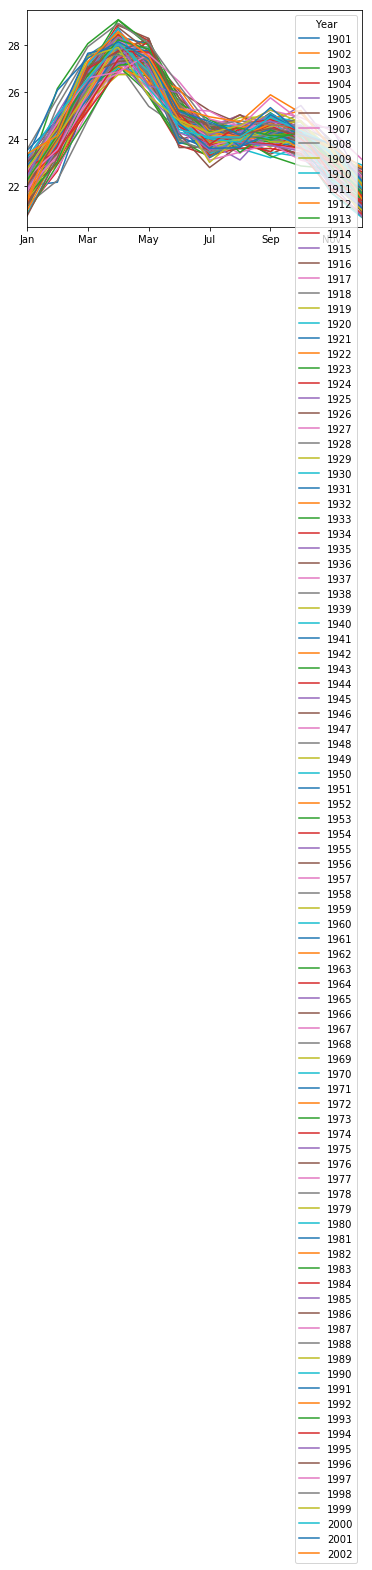

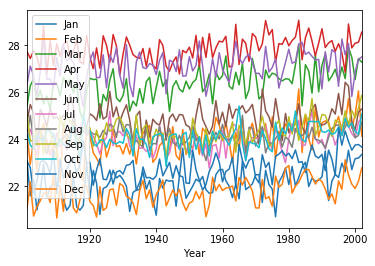

In [6]:
weather2 = weather.T
weather2.head()
weather2.plot()
weather.plot()

print(weather2[1960].agg(['min','idxmin']))
print(weather2[1960].agg(['max','idxmax']))
print(weather2[1960].agg(['min','max','mean']))

In [7]:
def f(year):
    print(weather2[year].max())
    print(weather2[year].min())
    print(weather2[year].mean())
f(1960)

28.142
21.814
24.564083333333333


Month with min gain in 2000 YoY: Mar
Month with max gain in 2000 YoY: May


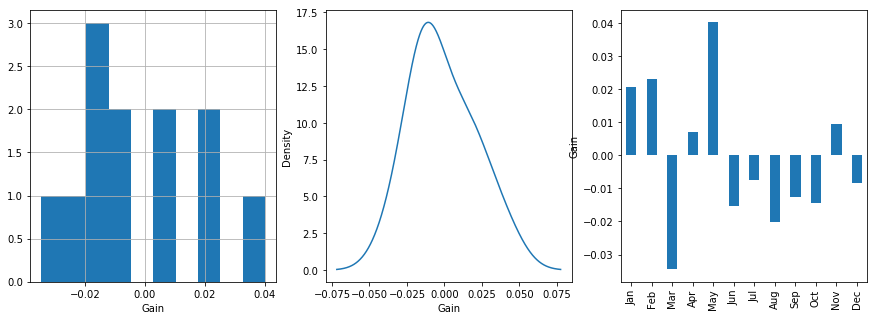

In [8]:
def f(year):
    gain = (weather2[year] - weather2[year-1])/weather2[year-1]
    print("Month with min gain in", year, "YoY:", gain.idxmin())
    print("Month with max gain in", year, "YoY:", gain.idxmax())
    plt.figure(figsize=(15,5))
    plt.subplot(131)
    gain.hist()
    plt.xlabel('Gain')
    plt.subplot(132)
    gain.plot(kind='kde')
    plt.xlabel('Gain')
    plt.subplot(133)
    gain.plot(kind='bar')
    plt.ylabel('Gain')
f(2000)

### Task 3 - Visualization

matplotlib
- Make a histogram for a particular month.
- Compare distributions for 2 months (histograms on subplots).
- Compare two years in the same histogram (use color coding).
- Define a function to compare two months in the same frame.
- Create a box plot for 1 month.
- Create a box plot for 2 months on 1 figure.
- Create a function that compares 2 months via boxplot.

seaborn
- Make a KDE plot of one month.
- Make a function that compares the KDE plots of 2 months.
- Compare the histogram and KDE plots of 2 months on the same figure.
- Create a Facetgrid version of the KDE plots. Loop through a months array.
- Create a violin plot for 1 month.
- Create a violin plot for 2 months on 1 figure.
- Create a function that compares 2 months via violin plot.

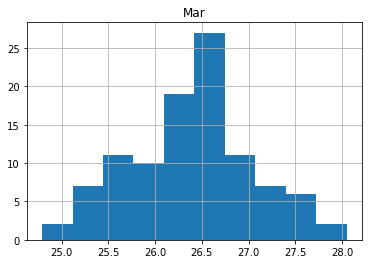

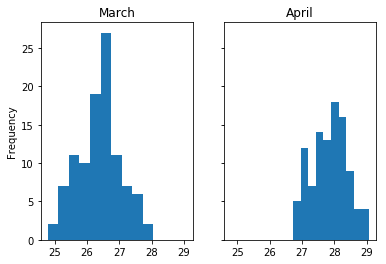

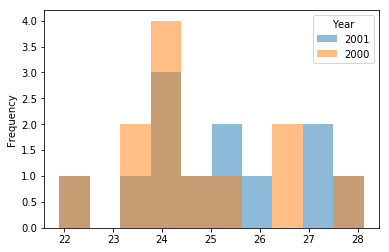

In [11]:
weather.hist(column='Mar')
plt.show()

ax = plt.subplot(121)
weather['Mar'].plot.hist()
plt.title('March')
plt.subplot(122, sharex=ax, sharey=ax)
weather['Apr'].plot.hist()
plt.title('April')
weather2[[2001,2000]].plot.hist(alpha=0.5)

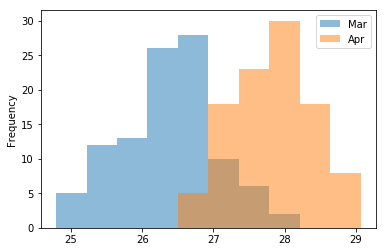

In [12]:
def f(x,y):
    weather[[x,y]].plot.hist(alpha=0.5)
f('Mar','Apr')

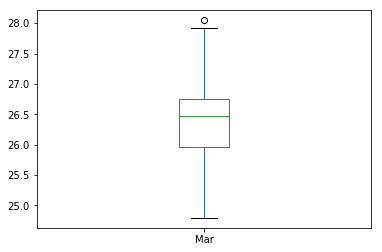

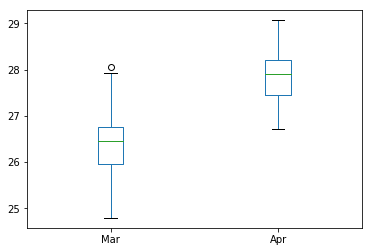

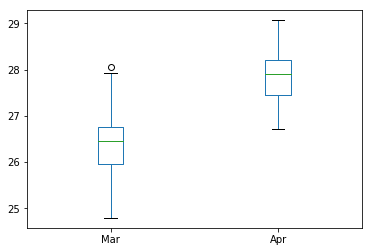

In [13]:
weather['Mar'].plot(kind='box')
weather[['Mar','Apr']].plot(kind='box')
def f(x,y):
    weather[[x,y]].plot(kind='box')
f('Mar','Apr')

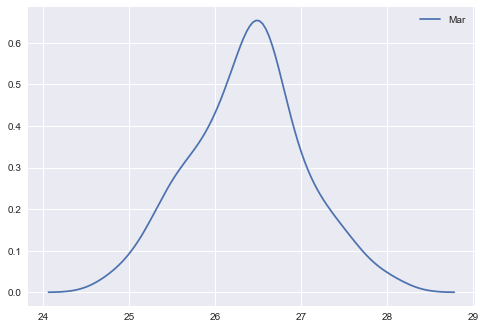

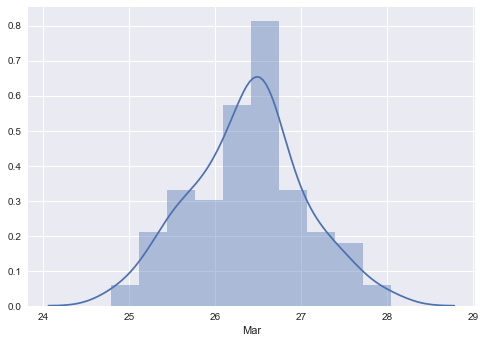

In [26]:
import seaborn as sns
sns.kdeplot(weather['Mar'])
plt.show()
sns.distplot(weather['Mar'])
plt.show()

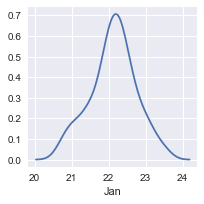

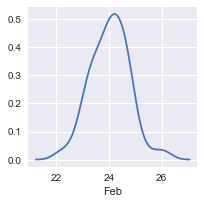

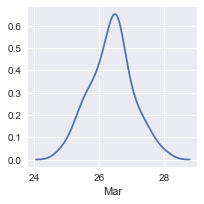

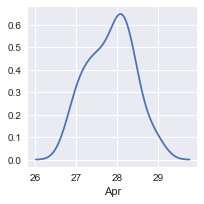

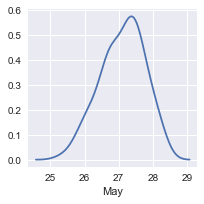

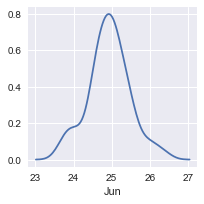

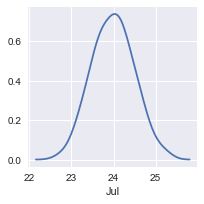

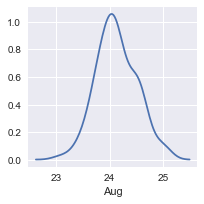

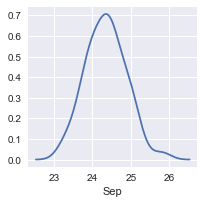

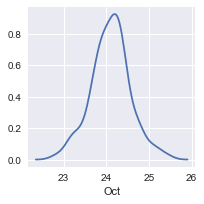

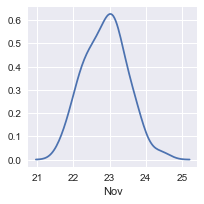

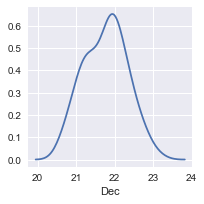

In [19]:
months = list(weather.columns)
for i in range(len(months)):
    g = sns.FacetGrid(weather)
    g.map(sns.kdeplot, months[i])

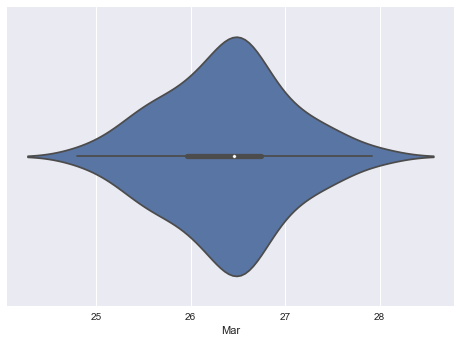

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


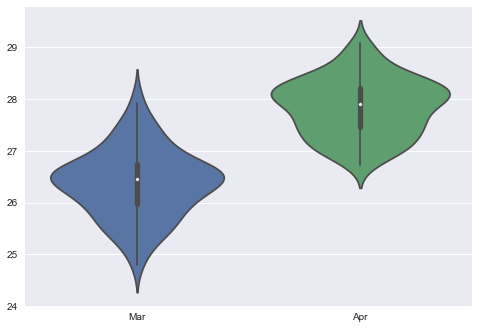

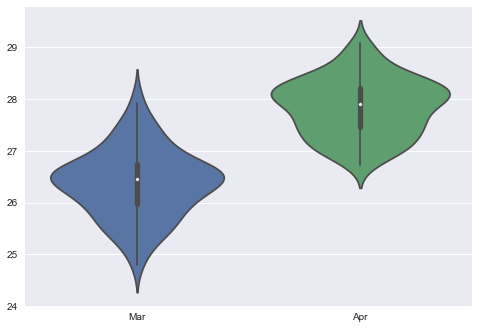

In [27]:
sns.violinplot(weather['Mar'])
plt.show()
sns.violinplot(weather[['Mar','Apr']])
plt.show()
def f(x,y):
    sns.violinplot(weather[[x,y]])
    plt.show()
f('Mar','Apr')

### Task 4 - Insight

- Visually represent the varying temperatures over the entire period.
- Find the coldest and warmest months for May over the entire period.

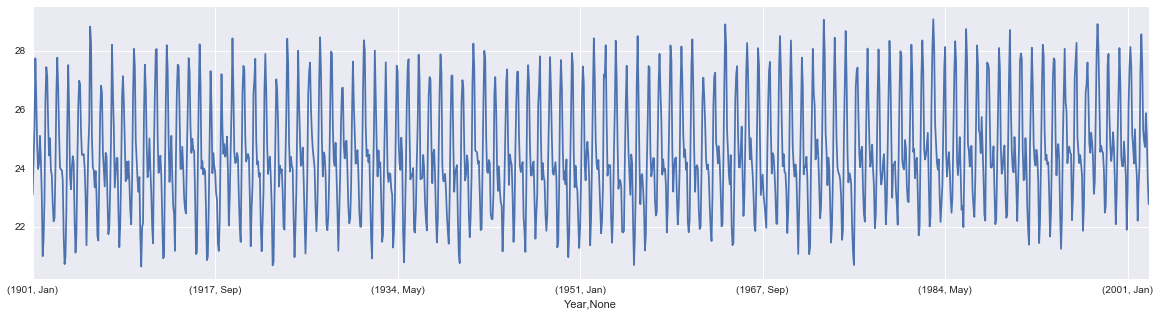

In [28]:
plt.figure(figsize=(20,5))
weather.stack().plot()